In [1]:
!git clone --branch swedish https://github.com/triphamday/comsl.git
%cd comsl

Cloning into 'comsl'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 237 (delta 112), reused 213 (delta 94), pack-reused 0 (from 0)
Receiving objects: 100% (237/237), 1.65 MiB | 6.53 MiB/s, done.
Resolving deltas: 100% (112/112), done.
/kaggle/working/comsl


In [2]:
!git branch

* swedish


# Install 

In [3]:
!pip install numpy==1.26.4 --force-reinstall -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 82.7 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.1 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.

In [4]:
!pip install transformers==4.29.1 pytorch_lightning==2.0.2 deepspeed==0.9.2 ffmpeg-python more_itertools==9.1.0 PyYAML==6.0 regex==2022.10.31 sacrebleu==2.3.1 torchmetrics==0.11.4 tqdm==4.64.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.3/779.3 kB 15.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 63.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.1/781.1 kB 18.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118

In [5]:
import warnings
warnings.filterwarnings("ignore", message="dataloader_idx is None")
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create forder for logs

In [6]:
import os

output_path = "/kaggle/working/comsl/output/comsl_mn2en/logs"
os.makedirs(output_path, exist_ok=True)
print(f"Đã tạo thư mục: {output_path}")

Đã tạo thư mục: /kaggle/working/comsl/output/comsl_mn2en/logs


# Remove logs (in case of re-running)

In [7]:
import os
import glob

log_dir = '/kaggle/working/comsl/output/comsl_mn2en/logs'

# Xóa tất cả file trong thư mục log_dir
for file_path in glob.glob(os.path.join(log_dir, '*')):
    try:
        os.remove(file_path)
    except IsADirectoryError:
        pass 

# Execute

In [7]:
!python /kaggle/working/comsl/run.py --config comsl.yaml

2025-05-31 22:51:53.877899: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748731914.066894     172 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748731914.123443     172 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/deepspeed/runtime/zero/linear.py:47: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @autocast_custom_fwd
/usr/local/lib/python3.11/dist-packages/deepspeed/runtime/zero/linear.py:66: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type=

# Visualize 

In [19]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os
import matplotlib.pyplot as plt

In [8]:
%pip install tensorboard -qq

Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip install matplotlib -qq

In [9]:
%load_ext tensorboard
%tensorboard --logdir /kaggle/working/comsl/output/comsl_mn2en/logs/ComST/default

<IPython.core.display.Javascript object>

In [10]:
import os

for file in os.listdir("/kaggle/working/comsl/output/comsl_mn2en/logs/ComST/default"):
    print(file)

events.out.tfevents.1748739413.ce66415e7efb.172.1
events.out.tfevents.1748731975.ce66415e7efb.172.0
hparams.yaml


## train and validation

In [35]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

log_dir = "/kaggle/working/comsl/output/comsl_mn2en/logs/ComST/default"
# Chọn file events lớn nhất/thường là mới nhất
event_files = [f for f in os.listdir(log_dir) if f.startswith('events.out.tfevents.1748731975.ce66415e7efb.172.0')]
event_path = os.path.join(log_dir, sorted(event_files)[-1])

event_acc = EventAccumulator(event_path)
event_acc.Reload()

print("Tất cả các scalar tag:")
print(event_acc.Tags()['scalars'])  

Tất cả các scalar tag:
['lr-AdamW/pg1', 'lr-AdamW/pg2', 'train_acc_asr', 'train_nll_loss_asr', 'train_acc_text_translate', 'train_nll_loss_text_translate', 'train_acc_speech_translate', 'train_nll_loss_speech_translate', 'train_acc_mix_speech_translate', 'train_nll_loss_mix_speech_translate', 'train_acc_mix_asr', 'train_nll_loss_mix_asr', 'train_acc_mix_mlm', 'train_nll_loss_mix_mlm', 'train_guide_loss', 'train_reg_loss', 'epoch', 'val_bleu_spch_epoch', 'val_bleu_text_epoch', 'val_wer_epoch', 'val_speech_nll_loss_epoch', 'val_speech_acc_epoch', 'val_asr_nll_loss_epoch', 'val_asr_acc_epoch', 'val_text_nll_loss_epoch', 'val_text_acc_epoch', 'val_mix_speech_nll_loss_epoch', 'val_mix_asr_nll_loss_epoch', 'val_mix_mlm_nll_loss_epoch', 'val_mix_speech_acc_epoch', 'val_mix_asr_acc_epoch', 'val_mix_mlm_acc_epoch', 'val_guide_loss_epoch', 'val_reg_loss_epoch']


In [38]:
train_acc = event_acc.Scalars('train_acc_speech_translate')

[ScalarEvent(wall_time=1748732093.4043024, step=49, value=16.666667938232422),
 ScalarEvent(wall_time=1748732205.9087667, step=99, value=50.0),
 ScalarEvent(wall_time=1748732318.1336236, step=149, value=18.18181800842285),
 ScalarEvent(wall_time=1748732431.1362402, step=199, value=33.333335876464844),
 ScalarEvent(wall_time=1748732543.6005304, step=249, value=22.22222328186035),
 ScalarEvent(wall_time=1748732656.165418, step=299, value=41.666664123535156),
 ScalarEvent(wall_time=1748732840.7292905, step=349, value=50.0),
 ScalarEvent(wall_time=1748732954.2561595, step=399, value=40.0),
 ScalarEvent(wall_time=1748733068.2969637, step=449, value=28.571430206298828),
 ScalarEvent(wall_time=1748733182.5041997, step=499, value=33.333335876464844),
 ScalarEvent(wall_time=1748733296.3198295, step=549, value=42.85714340209961),
 ScalarEvent(wall_time=1748733410.2116108, step=599, value=66.66667175292969),
 ScalarEvent(wall_time=1748733561.6946716, step=649, value=30.000001907348633),
 ScalarEv

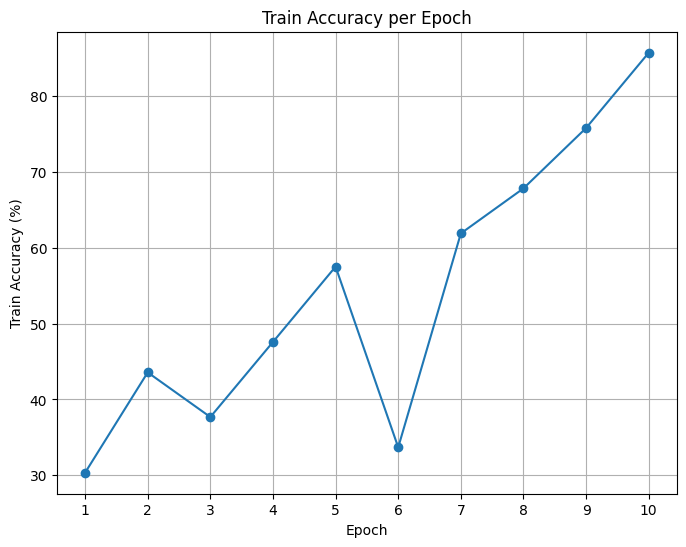

In [41]:
train_acc = event_acc.Scalars('train_acc_speech_translate')

steps = np.array([e.step for e in train_acc])
values = np.array([e.value for e in train_acc])

num_epochs = 10
total_steps = 3000
steps_per_epoch = total_steps // num_epochs  

start_step = steps[0] 

epoch_ids = ((steps - start_step) // steps_per_epoch).astype(int)

epoch_acc_dict = {}
for epoch in range(num_epochs):
    epoch_acc = values[epoch_ids == epoch]
    if len(epoch_acc) > 0:
        epoch_acc_dict[epoch + 1] = epoch_acc.mean()
    else:
        epoch_acc_dict[epoch + 1] = np.nan

epochs = np.arange(1, num_epochs + 1)
epoch_accs = np.array([epoch_acc_dict[e] for e in epochs])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, epoch_accs, marker='o')
plt.xticks(epochs)
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy (%)")
plt.title("Train Accuracy per Epoch")
plt.grid(True)
plt.show()

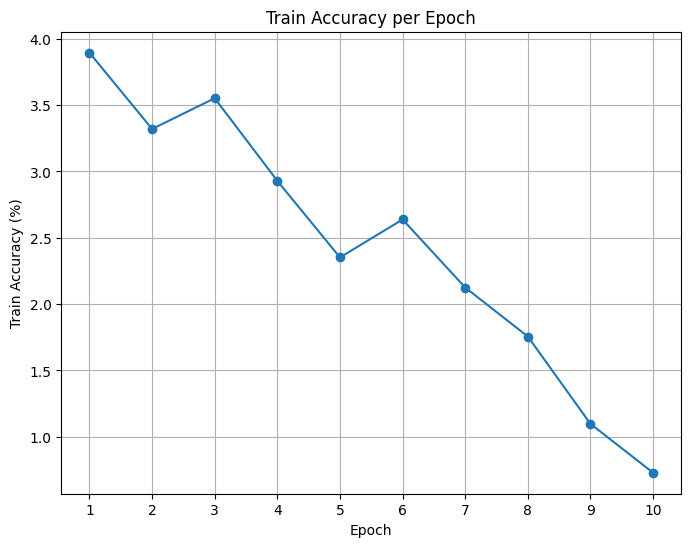

In [43]:
train_loss = event_acc.Scalars('train_nll_loss_speech_translate')

steps = np.array([e.step for e in train_loss])
values = np.array([e.value for e in train_loss])

num_epochs = 10
total_steps = 3000
steps_per_epoch = total_steps // num_epochs  

start_step = steps[0] 

epoch_ids = ((steps - start_step) // steps_per_epoch).astype(int)

epoch_acc_dict = {}
for epoch in range(num_epochs):
    epoch_acc = values[epoch_ids == epoch]
    if len(epoch_acc) > 0:
        epoch_acc_dict[epoch + 1] = epoch_acc.mean()
    else:
        epoch_acc_dict[epoch + 1] = np.nan

epochs = np.arange(1, num_epochs + 1)
epoch_accs = np.array([epoch_acc_dict[e] for e in epochs])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, epoch_accs, marker='o')
plt.xticks(epochs)
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy (%)")
plt.title("Train Accuracy per Epoch")
plt.grid(True)
plt.show()

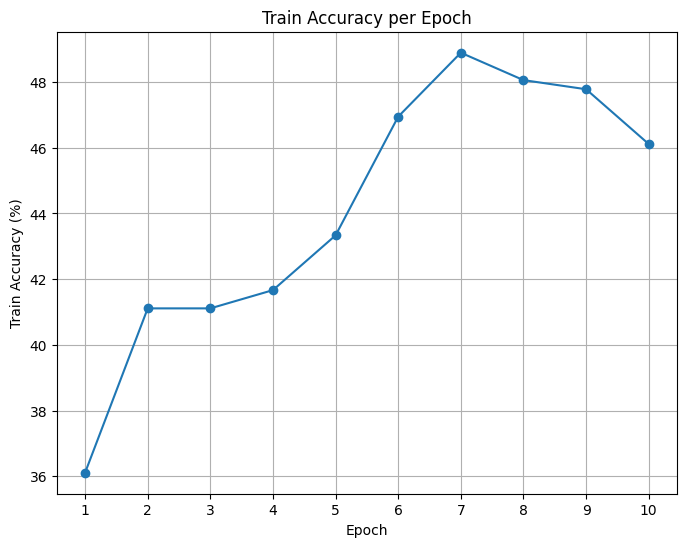

In [47]:
val_acc = event_acc.Scalars('val_speech_acc_epoch')

steps = np.array([e.step for e in val_acc])
values = np.array([e.value for e in val_acc])

num_epochs = 10
total_steps = 3000
steps_per_epoch = total_steps // num_epochs  

start_step = steps[0] 

epoch_ids = ((steps - start_step) // steps_per_epoch).astype(int)

epoch_acc_dict = {}
for epoch in range(num_epochs):
    epoch_acc = values[epoch_ids == epoch]
    if len(epoch_acc) > 0:
        epoch_acc_dict[epoch + 1] = epoch_acc.mean()
    else:
        epoch_acc_dict[epoch + 1] = np.nan

epochs = np.arange(1, num_epochs + 1)
epoch_accs = np.array([epoch_acc_dict[e] for e in epochs])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, epoch_accs, marker='o')
plt.xticks(epochs)
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy (%)")
plt.title("Train Accuracy per Epoch")
plt.grid(True)
plt.show()

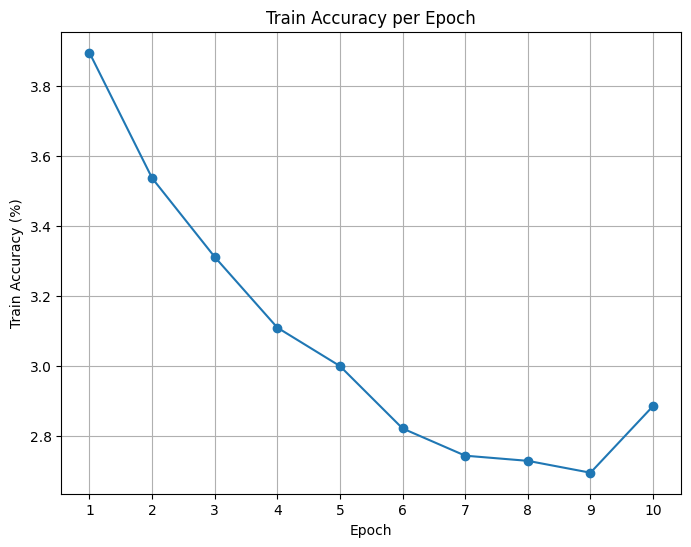

In [48]:
val_loss = event_acc.Scalars('val_speech_nll_loss_epoch')

steps = np.array([e.step for e in val_loss])
values = np.array([e.value for e in val_loss])

num_epochs = 10
total_steps = 3000
steps_per_epoch = total_steps // num_epochs  

start_step = steps[0] 

epoch_ids = ((steps - start_step) // steps_per_epoch).astype(int)

epoch_acc_dict = {}
for epoch in range(num_epochs):
    epoch_acc = values[epoch_ids == epoch]
    if len(epoch_acc) > 0:
        epoch_acc_dict[epoch + 1] = epoch_acc.mean()
    else:
        epoch_acc_dict[epoch + 1] = np.nan

epochs = np.arange(1, num_epochs + 1)
epoch_accs = np.array([epoch_acc_dict[e] for e in epochs])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, epoch_accs, marker='o')
plt.xticks(epochs)
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy (%)")
plt.title("Train Accuracy per Epoch")
plt.grid(True)
plt.show()

# test

In [52]:
test_events = [f for f in os.listdir(log_dir) if f.startswith('events.out')]
test_events = os.path.join(log_dir, sorted(test_events)[-1])

test_events = EventAccumulator(event_path)
test_events.Reload()

print("Tất cả các scalar tag:")
print(test_events.Tags()['scalars'])

Tất cả các scalar tag:
['test_bleu_spch_epoch', 'test_bleu_spch_0', 'test_bleu_text_epoch', 'test_bleu_text_0', 'test_wer_epoch', 'test_wer_0', 'epoch']
